#### Import Library & Load Data

In [1]:
import time
from tqdm import tqdm
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager
font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

import optuna
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score , mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import VotingClassifier
from vecstack import StackingTransformer, stacking

In [2]:
data = pd.read_csv('./data/Elderly.csv')
data.shape

(1531, 11)

In [3]:
data.head()

,Gender,Age,Religion,Job,Married,Edu,Health,Self_conf,Earn,Activity,target
0,0,73,3,1.0,0,0,1,0,0,0,1
1,0,79,2,2.0,1,1,2,2,0,3,5
2,1,77,3,1.0,1,0,2,2,2,0,3
3,0,72,1,2.0,0,0,2,1,0,0,1
4,0,72,2,1.0,0,1,1,1,0,0,1


#### EDA

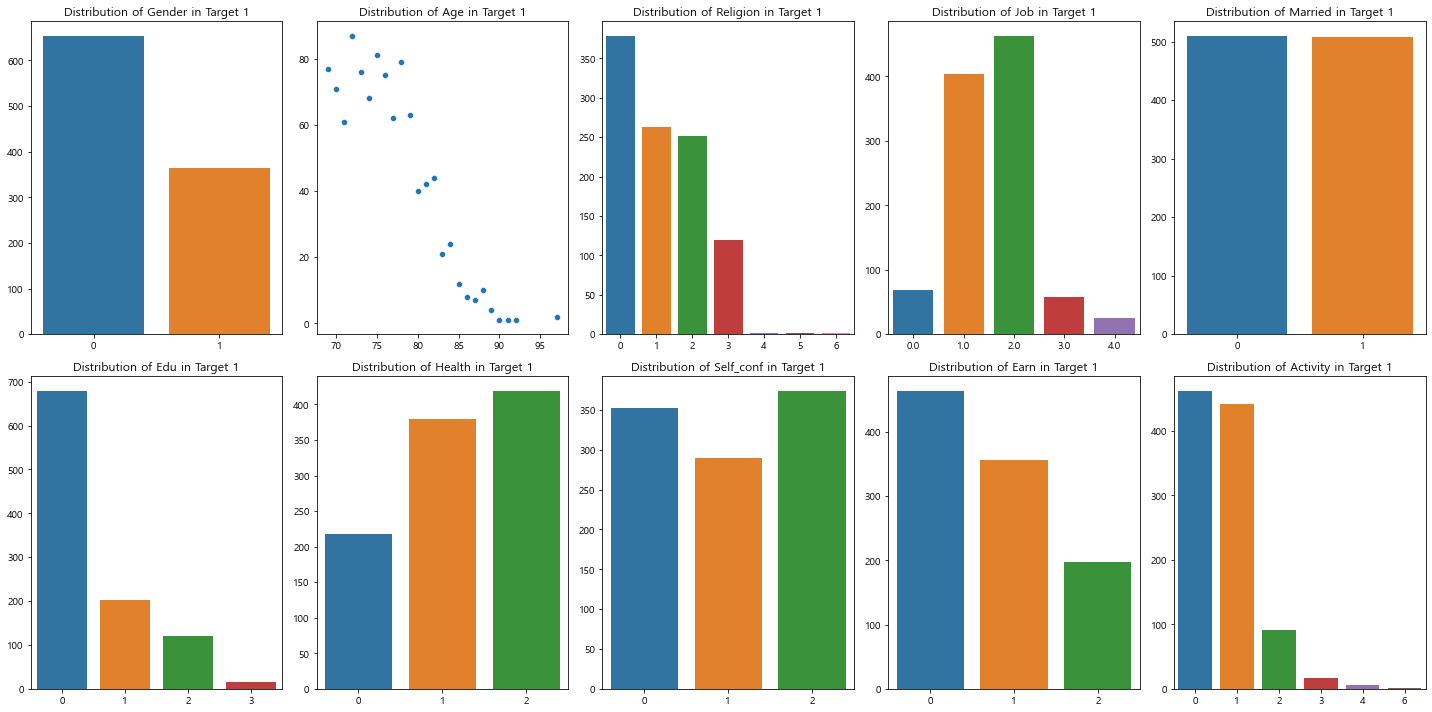

In [4]:
cols = data.drop(['target'], axis=1).columns
temp = data[data['target']==1]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 1')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 1')

plt.tight_layout()
plt.show()

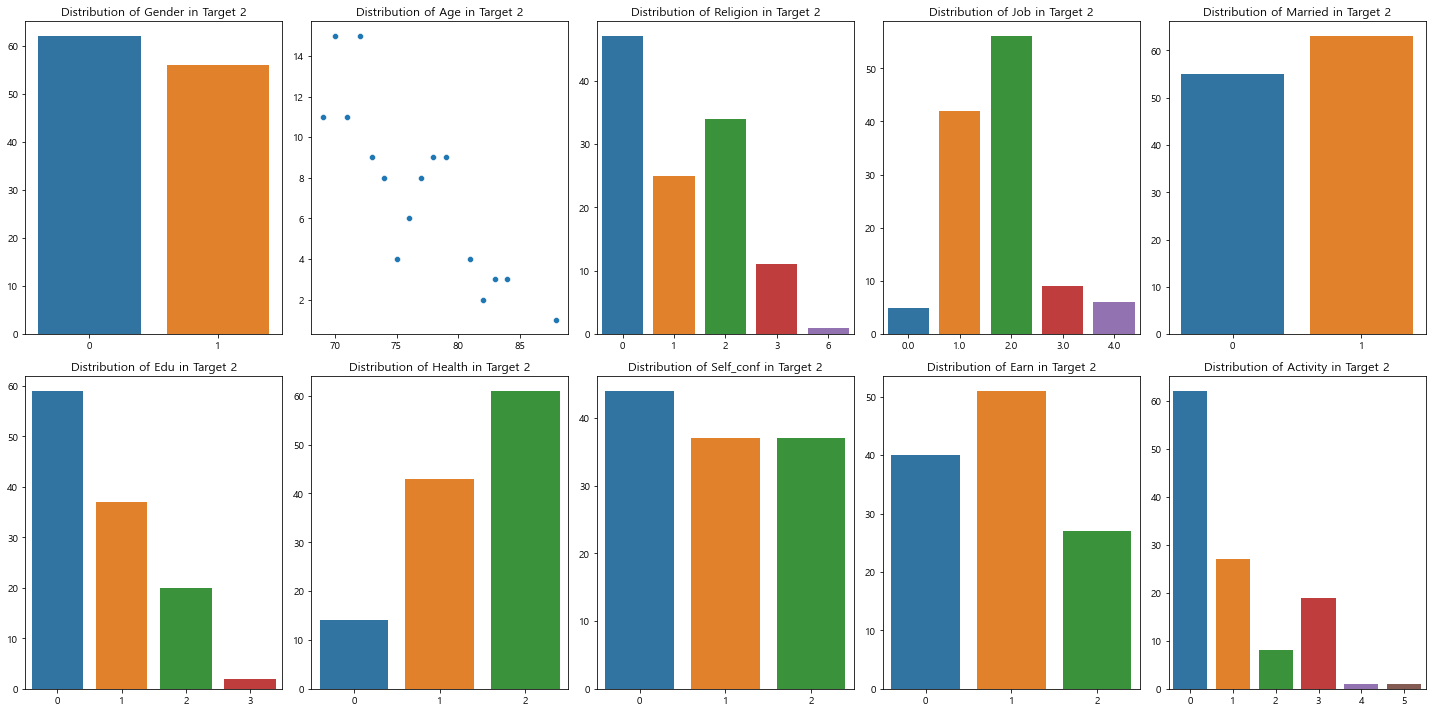

In [5]:
temp = data[data['target']==2]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 2')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 2')

plt.tight_layout()
plt.show()

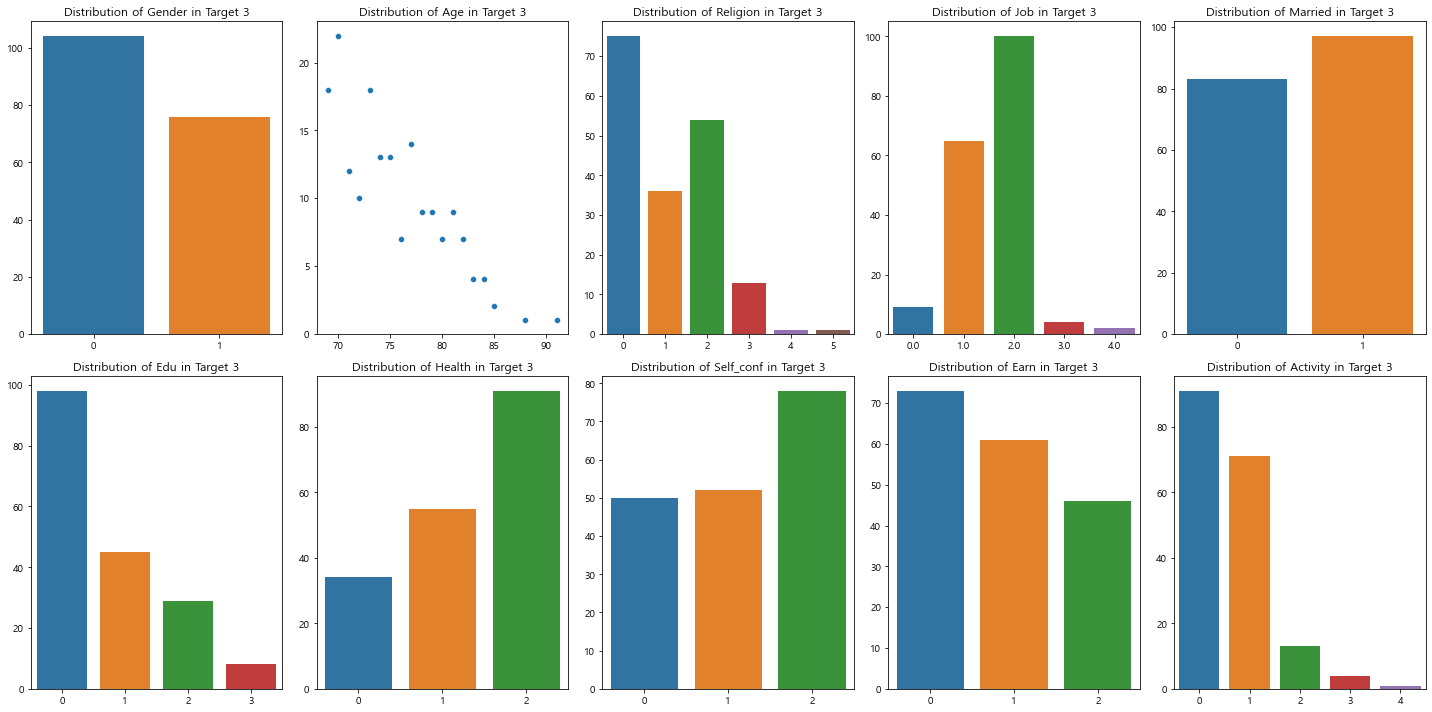

In [6]:
temp = data[data['target']==3]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 3')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 3')

plt.tight_layout()
plt.show()

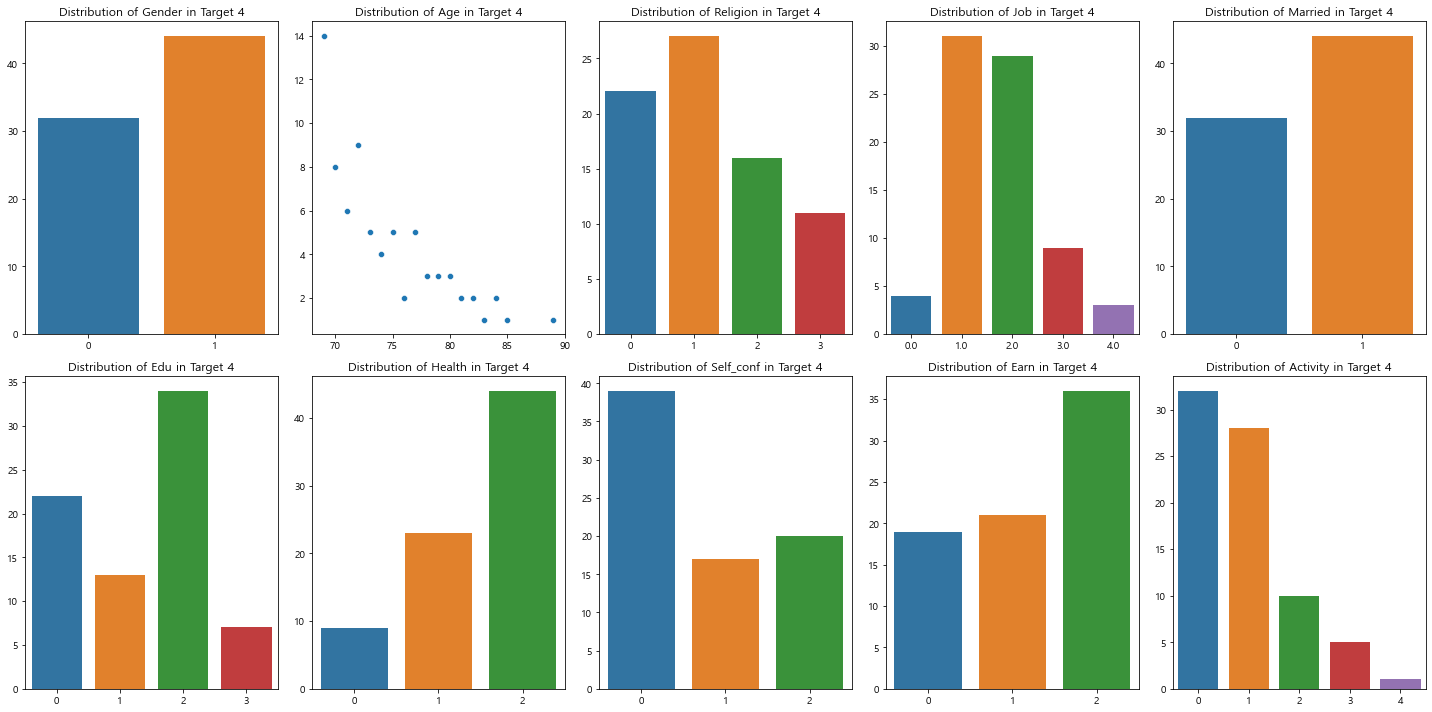

In [7]:
temp = data[data['target']==4]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 4')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 4')

plt.tight_layout()
plt.show()

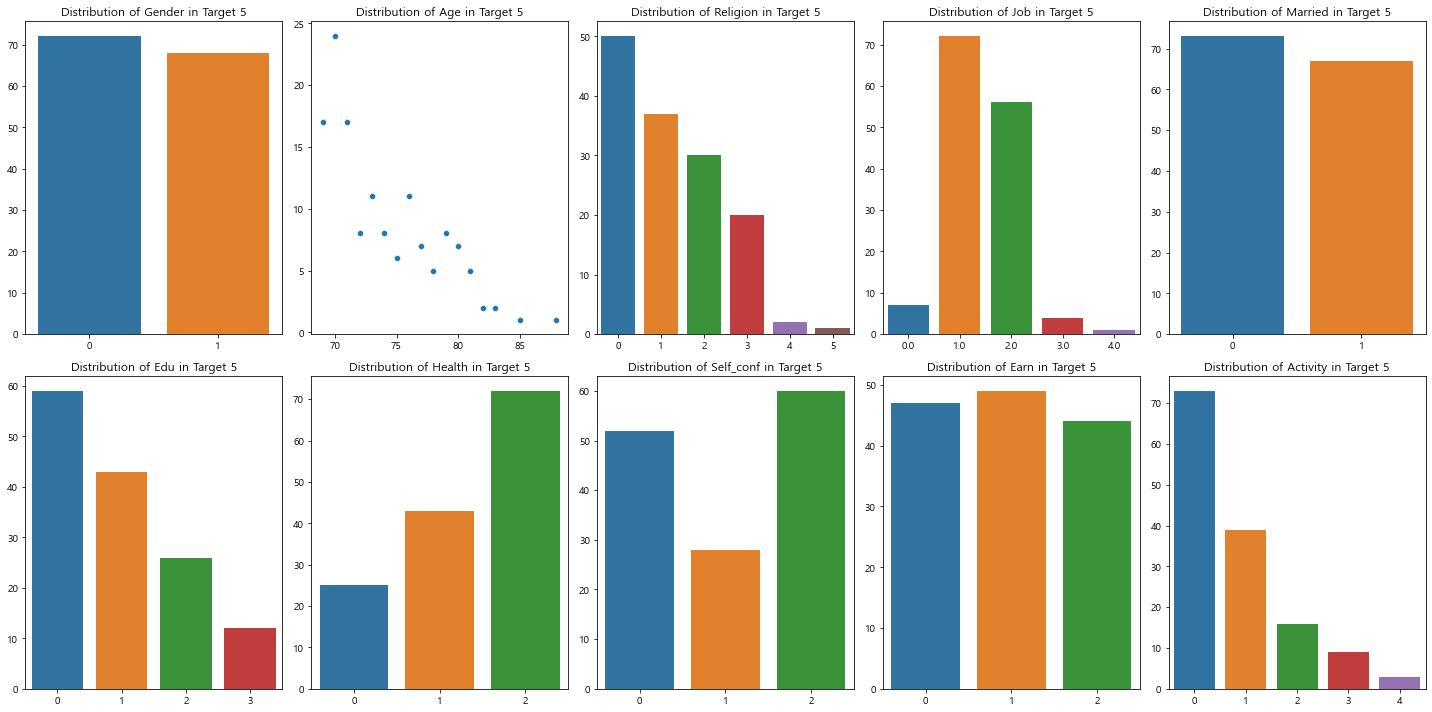

In [8]:
temp = data[data['target']==5]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for idx, col in enumerate(cols[:5]):
    if col == 'Age':
        sns.scatterplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    else:
        sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[0,idx])
    axes[0,idx].set_title(f'Distribution of {col} in Target 5')

for idx, col in enumerate(cols[5:]):
    sns.barplot(temp[col].value_counts().index, temp[col].value_counts().values, ax=axes[1,idx])
    axes[1,idx].set_title(f'Distribution of {col} in Target 5')

plt.tight_layout()
plt.show()

#### Oversampling

In [9]:
X = data.drop(['target'], axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2022)

In [10]:
y_train.value_counts()

1    813
3    144
5    112
2     94
4     61
Name: target, dtype: int64

In [11]:
oversampling_instance = SMOTE(random_state=2022)
X_train, y_train = oversampling_instance.fit_resample(X_train, y_train)
y_train.value_counts()

2    813
4    813
1    813
3    813
5    813
Name: target, dtype: int64

In [12]:
lr = LogisticRegression(random_state=2022, multi_class='multinomial')
lr.fit(X_train, y_train)
pred = lr.predict_proba(X_test)
roc_auc_score(y_test, pred, multi_class='ovo')

0.5845319794584499

In [13]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_poly, y, stratify=y, test_size=0.2, random_state=2022)
lr = LogisticRegression(random_state=2022, multi_class='multinomial')
lr.fit(X_train_2, y_train_2)
pred = lr.predict_proba(X_test_2)
print('Polynomial LogisticRegression: ',roc_auc_score(y_test_2, pred, multi_class='ovo'))

X_train_2, y_train_2 = oversampling_instance.fit_resample(X_train_2, y_train_2)
lr = LogisticRegression(random_state=2022, multi_class='multinomial')
lr.fit(X_train_2, y_train_2)
pred = lr.predict_proba(X_test_2)
print('Polynomial + SMOTE LogisticRegression: ',roc_auc_score(y_test_2, pred, multi_class='ovo'))

Polynomial LogisticRegression:  0.5
Polynomial + SMOTE LogisticRegression:  0.6051062091503269


#### Modeling

In [14]:
# RandomSearch Tuning
tuned_models = []

clfs = [
(RandomForestClassifier(random_state=2022, n_jobs=-1),
    {'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 70, 90, 110],
    'max_depth': [3, 5, 7,10],
    'max_features': [0.8,0.85,0.9]}
),
(LGBMClassifier(random_state=2022, objective='multiclass', n_jobs=-1),
    {'learning_rate': np.arange(0.1, 0.6, 0.1),
        'n_estimators': [100,125,150,175,200],
        'max_depth': [3,5,7,9],
        'min_child_weight': [3,8,13],
        'subsample': [0.75,0.85,0.95]}
),
(XGBClassifier(random_state=2022),
    {'learning_rate': [0.05,0.35,0.65,1.0],
        'n_estimators': [100,125,150,175,200],
        'max_depth': [3,5,7,9],
        'min_child_weight': [3,8,13],
        'subsample': [0.75, 0.85, 0.95],
        'gamma': [0,2,4]}
),
(CatBoostClassifier(random_seed=2022),
    {'learning_rate': [0.05, 0.35, 0.65, 1.0],
    'n_estimators': [100,125,150,175,200],
    'max_depth':[3,5,7,9]}
),
(LogisticRegression(random_state=2022, multi_class='multinomial'),
    {'C': [100, 10, 1, 0.1, 0.01],
    'penalty':['none', 'l1', 'l2', 'elasticnet']}
)
]

for clf, param_grid in tqdm(clfs):
    rs = RandomizedSearchCV(clf, param_distributions = param_grid, scoring='accuracy', n_iter=30, random_state=2022, n_jobs=-1)
    scores = cross_val_score(rs, X_train, y_train, scoring='accuracy', cv = 5, n_jobs=-1)
    clf_name = type(clf).__name__
    clf_score = max(scores)

    print(f'모델: {clf_name:30} 성능: {clf_score}')
    
    tuned_models.append((clf_name, rs, clf_score))

 20%|██        | 1/5 [00:29<01:59, 29.90s/it]

모델: RandomForestClassifier         성능: 0.7884378843788438


 40%|████      | 2/5 [00:56<01:23, 27.73s/it]

모델: LGBMClassifier                 성능: 0.8450184501845018


 60%|██████    | 3/5 [04:24<03:40, 110.03s/it]

모델: XGBClassifier                  성능: 0.8536285362853628


 80%|████████  | 4/5 [06:09<01:48, 108.02s/it]

모델: CatBoostClassifier             성능: 0.8610086100861009


100%|██████████| 5/5 [06:15<00:00, 75.03s/it] 

모델: LogisticRegression             성능: 0.33948339483394835


In [15]:
bayesian_tuned = []

In [16]:
# Bayesian Tuning of RandomForest

def objective(trial):
      
    rf_n_estimators = trial.suggest_int("n_estimators", 50, 150)
    rf_max_depth = trial.suggest_int("max_depth", 2, 10, log=True)
    rf_max_features = trial.suggest_float("max_features", 0.6, 0.95)
    rf_criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    

    classifier_obj = RandomForestClassifier(n_estimators=rf_n_estimators, 
                                            max_depth=rf_max_depth,
                                            max_features=rf_max_features,
                                            criterion=rf_criterion,
                                            n_jobs=-1, 
                                            random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

model = RandomForestClassifier(**study.best_params, n_jobs=-1, random_state=2020)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

[I 2022-05-18 18:22:57,521] A new study created in memory with name: no-name-9cec2b92-8497-491c-81a9-3435f19f2fc2
[I 2022-05-18 18:22:57,730] Trial 0 finished with value: 0.38499785148537846 and parameters: {'n_estimators': 52, 'max_depth': 3, 'max_features': 0.8980413552728364, 'criterion': 'gini'}. Best is trial 0 with value: 0.38499785148537846.
[I 2022-05-18 18:22:58,694] Trial 1 finished with value: 0.5079966843193273 and parameters: {'n_estimators': 88, 'max_depth': 5, 'max_features': 0.8706648542433661, 'criterion': 'gini'}. Best is trial 1 with value: 0.5079966843193273.
[I 2022-05-18 18:22:59,742] Trial 2 finished with value: 0.6356668428061536 and parameters: {'n_estimators': 121, 'max_depth': 7, 'max_features': 0.7690895483692073, 'criterion': 'entropy'}. Best is trial 2 with value: 0.6356668428061536.
[I 2022-05-18 18:23:00,074] Trial 3 finished with value: 0.5544890406398315 and parameters: {'n_estimators': 117, 'max_depth': 6, 'max_features': 0.9441855732750317, 'criterio

FrozenTrial(number=65, values=[0.7662977415433689], datetime_start=datetime.datetime(2022, 5, 18, 18, 23, 14, 594921), datetime_complete=datetime.datetime(2022, 5, 18, 18, 23, 14, 920116), params={'n_estimators': 141, 'max_depth': 10, 'max_features': 0.6254508203028177, 'criterion': 'entropy'}, distributions={'n_estimators': IntUniformDistribution(high=150, low=50, step=1), 'max_depth': IntLogUniformDistribution(high=10, low=2, step=1), 'max_features': UniformDistribution(high=0.95, low=0.6), 'criterion': CategoricalDistribution(choices=('gini', 'entropy'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=65, state=TrialState.COMPLETE, value=None)
[0.65928659 0.80688807 0.77490775 0.77859779 0.78105781]
최대 성능: {0.8068880688806888} 평균 성능: {0.7601476014760147}


In [17]:
optuna.visualization.plot_optimization_history(study)

In [18]:
optuna.visualization.plot_parallel_coordinate(study)

In [19]:
# Bayesian Tuning of LGBM

def objective(trial):
    
    lgb_n_estimators = trial.suggest_int("n_estimators", 100, 200)
    lgb_max_depth = trial.suggest_int("max_depth", 2, 10)
    lgb_min_child_weight = trial.suggest_int("min_child_weight", 2, 15)
    lgb_learning_rate = trial.suggest_float('learning_rate', 0.05, 0.8)
    lgb_subsample = trial.suggest_float("subsample", 0.7, 0.95)
    

    classifier_obj = LGBMClassifier(n_estimators=lgb_n_estimators, 
                                    max_depth=lgb_max_depth,
                                    min_child_weight=lgb_min_child_weight,
                                    learning_rate=lgb_learning_rate,
                                    subsample = lgb_subsample,
                                    objective = 'multiclass',
                                    n_jobs=-1, 
                                    random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

model = LGBMClassifier(**study.best_params, n_jobs=-1, random_state=2020)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

[I 2022-05-18 18:23:26,498] A new study created in memory with name: no-name-cc7cf0e1-ea9f-45e8-9cda-ea514f33e263
[I 2022-05-18 18:23:27,628] Trial 0 finished with value: 0.7778571373268607 and parameters: {'n_estimators': 120, 'max_depth': 7, 'min_child_weight': 13, 'learning_rate': 0.36475103651369495, 'subsample': 0.9012081462660756}. Best is trial 0 with value: 0.7778571373268607.
[I 2022-05-18 18:23:28,768] Trial 1 finished with value: 0.7419394409216546 and parameters: {'n_estimators': 149, 'max_depth': 3, 'min_child_weight': 12, 'learning_rate': 0.792395247073109, 'subsample': 0.8967109220345819}. Best is trial 0 with value: 0.7778571373268607.
[I 2022-05-18 18:23:30,442] Trial 2 finished with value: 0.8024573877933401 and parameters: {'n_estimators': 153, 'max_depth': 8, 'min_child_weight': 7, 'learning_rate': 0.6551579409511442, 'subsample': 0.8747248512442503}. Best is trial 2 with value: 0.8024573877933401.
[I 2022-05-18 18:23:31,366] Trial 3 finished with value: 0.638124811

FrozenTrial(number=78, values=[0.8231247435331646], datetime_start=datetime.datetime(2022, 5, 18, 18, 24, 26, 279738), datetime_complete=datetime.datetime(2022, 5, 18, 18, 24, 27, 931842), params={'n_estimators': 197, 'max_depth': 10, 'min_child_weight': 2, 'learning_rate': 0.16184820576538095, 'subsample': 0.8014699553524676}, distributions={'n_estimators': IntUniformDistribution(high=200, low=100, step=1), 'max_depth': IntUniformDistribution(high=10, low=2, step=1), 'min_child_weight': IntUniformDistribution(high=15, low=2, step=1), 'learning_rate': UniformDistribution(high=0.8, low=0.05), 'subsample': UniformDistribution(high=0.95, low=0.7)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=78, state=TrialState.COMPLETE, value=None)
[0.65928659 0.86469865 0.83394834 0.83640836 0.84132841]
최대 성능: {0.8646986469864698} 평균 성능: {0.8071340713407136}


In [20]:
optuna.visualization.plot_optimization_history(study)

In [21]:
optuna.visualization.plot_parallel_coordinate(study)

In [22]:
# Bayesian Tuning of XGB

def objective(trial):
    
    xgb_n_estimators = trial.suggest_int("n_estimators", 100, 200)
    xgb_max_depth = trial.suggest_int("max_depth", 2, 10)
    xgb_min_child_weight = trial.suggest_int("min_child_weight", 2, 15)
    xgb_learning_rate = trial.suggest_float('learning_rate', 0.05, 0.8)
    xgb_subsample = trial.suggest_float("subsample", 0.7, 0.95)
    xgb_gamma = trial.suggest_int('gamma', 0, 5)
    

    classifier_obj = XGBClassifier(n_estimators=xgb_n_estimators, 
                                    max_depth=xgb_max_depth,
                                    min_child_weight=xgb_min_child_weight,
                                    learning_rate=xgb_learning_rate,
                                    subsample = xgb_subsample,
                                    gamma = xgb_gamma,
                                    random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

model = XGBClassifier(**study.best_params, random_state=2020)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

[I 2022-05-18 18:24:49,947] A new study created in memory with name: no-name-acdd0a99-e668-4699-9269-95351349a4f6
[I 2022-05-18 18:24:51,562] Trial 0 finished with value: 0.7503050987542486 and parameters: {'n_estimators': 161, 'max_depth': 6, 'min_child_weight': 10, 'learning_rate': 0.46069403274390364, 'subsample': 0.9469679635957856, 'gamma': 2}. Best is trial 0 with value: 0.7503050987542486.
[I 2022-05-18 18:24:52,354] Trial 1 finished with value: 0.752515068636332 and parameters: {'n_estimators': 110, 'max_depth': 4, 'min_child_weight': 14, 'learning_rate': 0.5766967528555205, 'subsample': 0.9059575033492452, 'gamma': 0}. Best is trial 1 with value: 0.752515068636332.
[I 2022-05-18 18:24:54,351] Trial 2 finished with value: 0.8179545173003817 and parameters: {'n_estimators': 117, 'max_depth': 10, 'min_child_weight': 3, 'learning_rate': 0.20045842139759262, 'subsample': 0.707576950314872, 'gamma': 0}. Best is trial 2 with value: 0.8179545173003817.
[I 2022-05-18 18:24:55,387] Tria

FrozenTrial(number=84, values=[0.8253361651143165], datetime_start=datetime.datetime(2022, 5, 18, 18, 27, 16, 850353), datetime_complete=datetime.datetime(2022, 5, 18, 18, 27, 18, 750915), params={'n_estimators': 106, 'max_depth': 10, 'min_child_weight': 2, 'learning_rate': 0.19384941808610945, 'subsample': 0.7485393816119124, 'gamma': 0}, distributions={'n_estimators': IntUniformDistribution(high=200, low=100, step=1), 'max_depth': IntUniformDistribution(high=10, low=2, step=1), 'min_child_weight': IntUniformDistribution(high=15, low=2, step=1), 'learning_rate': UniformDistribution(high=0.8, low=0.05), 'subsample': UniformDistribution(high=0.95, low=0.7), 'gamma': IntUniformDistribution(high=5, low=0, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=84, state=TrialState.COMPLETE, value=None)
[0.67650677 0.87207872 0.82410824 0.84378844 0.84501845]
최대 성능: {0.8720787207872078} 평균 성능: {0.8123001230012301}


In [23]:
optuna.visualization.plot_optimization_history(study)

In [24]:
optuna.visualization.plot_parallel_coordinate(study)

In [25]:
# Bayesian Tuning of Catboost

def objective(trial):
      
    cat_n_estimators = trial.suggest_int("n_estimators", 100, 200)
    cat_max_depth = trial.suggest_int("max_depth", 2, 10)
    cat_learning_rate = trial.suggest_float("learning_rate", 0.05, 0.8)

    classifier_obj = CatBoostClassifier(n_estimators=cat_n_estimators, 
                                    max_depth=cat_max_depth,
                                    learning_rate=cat_learning_rate,
                                    random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=72)
print(study.best_trial)

model = CatBoostClassifier(**study.best_params, random_state=2020)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

[I 2022-05-18 18:27:54,058] A new study created in memory with name: no-name-dd8f32dd-f148-438a-a069-7996112fd620
[I 2022-05-18 18:28:01,141] Trial 0 finished with value: 0.8125435509720577 and parameters: {'n_estimators': 151, 'max_depth': 10, 'learning_rate': 0.6938053302140389}. Best is trial 0 with value: 0.8125435509720577.
[I 2022-05-18 18:28:02,042] Trial 1 finished with value: 0.6710902356785047 and parameters: {'n_estimators': 101, 'max_depth': 3, 'learning_rate': 0.7884610086604662}. Best is trial 0 with value: 0.8125435509720577.
[I 2022-05-18 18:28:03,614] Trial 2 finished with value: 0.8186958516247417 and parameters: {'n_estimators': 165, 'max_depth': 6, 'learning_rate': 0.5815392960540231}. Best is trial 2 with value: 0.8186958516247417.
[I 2022-05-18 18:28:04,764] Trial 3 finished with value: 0.7660453878552791 and parameters: {'n_estimators': 157, 'max_depth': 4, 'learning_rate': 0.7803689897112671}. Best is trial 2 with value: 0.8186958516247417.
[I 2022-05-18 18:28:0

FrozenTrial(number=71, values=[0.8255817442067529], datetime_start=datetime.datetime(2022, 5, 18, 18, 30, 52, 22702), datetime_complete=datetime.datetime(2022, 5, 18, 18, 30, 54, 571309), params={'n_estimators': 194, 'max_depth': 8, 'learning_rate': 0.33225408719217814}, distributions={'n_estimators': IntUniformDistribution(high=200, low=100, step=1), 'max_depth': IntUniformDistribution(high=10, low=2, step=1), 'learning_rate': UniformDistribution(high=0.8, low=0.05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=71, state=TrialState.COMPLETE, value=None)
[0.72078721 0.86592866 0.84624846 0.8499385  0.86592866]
최대 성능: {0.8659286592865929} 평균 성능: {0.8297662976629766}


In [26]:
optuna.visualization.plot_optimization_history(study)

In [27]:
optuna.visualization.plot_parallel_coordinate(study)

In [28]:
# Bayesian Tuning of LogisticRegression

def objective(trial):
      
    lr_c = trial.suggest_float("C", 0.01, 100)


    classifier_obj = LogisticRegression(C=lr_c, 
                                    multi_class='multinomial',
                                    random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

model = LogisticRegression(**study.best_params, random_state=2020)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bayesian_tuned.append((model.__class__.__name__, model, max(scores)))

[I 2022-05-18 18:30:57,661] A new study created in memory with name: no-name-9247b051-3608-498e-b1fb-941846b01b51
[I 2022-05-18 18:30:57,796] Trial 0 finished with value: 0.31193335346356044 and parameters: {'C': 98.35390152014148}. Best is trial 0 with value: 0.31193335346356044.
[I 2022-05-18 18:30:57,917] Trial 1 finished with value: 0.30971927043411607 and parameters: {'C': 98.87686804633553}. Best is trial 0 with value: 0.31193335346356044.
[I 2022-05-18 18:30:58,061] Trial 2 finished with value: 0.3099638817271735 and parameters: {'C': 89.80536266275843}. Best is trial 0 with value: 0.31193335346356044.
[I 2022-05-18 18:30:58,184] Trial 3 finished with value: 0.31439253168575165 and parameters: {'C': 15.223492130405026}. Best is trial 3 with value: 0.31439253168575165.
[I 2022-05-18 18:30:58,320] Trial 4 finished with value: 0.31045600771142545 and parameters: {'C': 69.93356658359646}. Best is trial 3 with value: 0.31439253168575165.
[I 2022-05-18 18:30:58,440] Trial 5 finished w

FrozenTrial(number=47, values=[0.3151309626119744], datetime_start=datetime.datetime(2022, 5, 18, 18, 31, 3, 615616), datetime_complete=datetime.datetime(2022, 5, 18, 18, 31, 3, 739616), params={'C': 33.267442770919345}, distributions={'C': UniformDistribution(high=100.0, low=0.01)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=47, state=TrialState.COMPLETE, value=None)
[0.27429274 0.34071341 0.3198032  0.32841328 0.31857319]
최대 성능: {0.34071340713407133} 평균 성능: {0.3163591635916359}


In [29]:
optuna.visualization.plot_optimization_history(study)

In [30]:
optuna.visualization.plot_parallel_coordinate(study)

#### Stacking

In [31]:
# RandomsearchCV Model
print("RandomSearch CV:", tuned_models)
rf_rs = (tuned_models[0][0],tuned_models[0][1])
lgb_rs = (tuned_models[1][0],tuned_models[1][1])
xgb_rs = (tuned_models[2][0],tuned_models[2][1])
cat_rs = (tuned_models[3][0],tuned_models[3][1])

estimators = [rf_rs, lgb_rs, xgb_rs, cat_rs]
ensemble_softVoting = VotingClassifier(estimators= estimators, voting='soft', n_jobs=-1)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)

print('앙상블 성능: ', np.mean(cross_val_score(ensemble_softVoting, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)))

ensemble_softVoting.fit(X_train, y_train)

pred_rs_voting = ensemble_softVoting.predict_proba(X_test)

RandomSearch CV: [('RandomForestClassifier', RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=2022),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 10],
                                        'max_features': [0.8, 0.85, 0.9],
                                        'n_estimators': [50, 70, 90, 110]},
                   random_state=2022, scoring='accuracy'), 0.7884378843788438), ('LGBMClassifier', RandomizedSearchCV(estimator=LGBMClassifier(objective='multiclass',
                                            random_state=2022),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight

In [32]:
stack_estimators = [estimators[i][1].estimator for i in range(len(estimators))]
S_train, S_test = stacking(stack_estimators,
                        X_train, y_train, X_test, regression=False, needs_proba=True, metric='accuracy', n_folds=4, stratified=True, shuffle=True, random_state=2022)

[18:39:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [33]:
# Meta Model Optimiazaiton

def objective(trial):
    
    lgb_n_estimators = trial.suggest_int("n_estimators", 50, 250)
    lgb_max_depth = trial.suggest_int("max_depth", 2, 10)
    lgb_min_child_weight = trial.suggest_int("min_child_weight", 2, 15)
    lgb_learning_rate = trial.suggest_float('learning_rate', 0.01, 1.5)
    lgb_subsample = trial.suggest_float("subsample", 0.7, 0.95)
    lgb_colsample_bytree = trial.suggest_float("colsample_bytree", 0.75, 0.9)
    lgb_num_leaves = trial.suggest_int('num_leaves', 2, 10)
    

    classifier_obj = LGBMClassifier(n_estimators=lgb_n_estimators, 
                                    max_depth=lgb_max_depth,
                                    min_child_weight=lgb_min_child_weight,
                                    learning_rate=lgb_learning_rate,
                                    subsample = lgb_subsample,
                                    colsample_bytree= lgb_colsample_bytree,
                                    num_leaves = lgb_num_leaves,
                                    objective = 'multiclass',
                                    n_jobs=-1, 
                                    random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, S_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

rs_meta = LGBMClassifier(**study.best_params, n_jobs=-1, random_state=2020)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
scores = cross_val_score(rs_meta, S_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

rs_meta.fit(S_train, y_train)
pred_rs = rs_meta.predict_proba(S_test)

[I 2022-05-18 18:39:55,655] A new study created in memory with name: no-name-8dc813c3-ccd4-4d23-86aa-a0c75d8d3d99
[I 2022-05-18 18:39:57,403] Trial 0 finished with value: 0.8238653520079902 and parameters: {'n_estimators': 204, 'max_depth': 8, 'min_child_weight': 13, 'learning_rate': 0.30733624755196975, 'subsample': 0.7565207946260217, 'colsample_bytree': 0.7982099974584298, 'num_leaves': 3}. Best is trial 0 with value: 0.8238653520079902.
[I 2022-05-18 18:39:59,079] Trial 1 finished with value: 0.8105764987341184 and parameters: {'n_estimators': 166, 'max_depth': 7, 'min_child_weight': 7, 'learning_rate': 0.9535905225533319, 'subsample': 0.8687442674561209, 'colsample_bytree': 0.8098511979811472, 'num_leaves': 5}. Best is trial 0 with value: 0.8238653520079902.
[I 2022-05-18 18:40:00,611] Trial 2 finished with value: 0.6597529498525074 and parameters: {'n_estimators': 104, 'max_depth': 3, 'min_child_weight': 3, 'learning_rate': 1.2679725320642294, 'subsample': 0.7834025985815626, 'co

FrozenTrial(number=52, values=[0.8400970412437383], datetime_start=datetime.datetime(2022, 5, 18, 18, 40, 10, 943093), datetime_complete=datetime.datetime(2022, 5, 18, 18, 40, 11, 84094), params={'n_estimators': 99, 'max_depth': 3, 'min_child_weight': 8, 'learning_rate': 0.06809498028930996, 'subsample': 0.7509353270918737, 'colsample_bytree': 0.8291081752322198, 'num_leaves': 2}, distributions={'n_estimators': IntUniformDistribution(high=250, low=50, step=1), 'max_depth': IntUniformDistribution(high=10, low=2, step=1), 'min_child_weight': IntUniformDistribution(high=15, low=2, step=1), 'learning_rate': UniformDistribution(high=1.5, low=0.01), 'subsample': UniformDistribution(high=0.95, low=0.7), 'colsample_bytree': UniformDistribution(high=0.9, low=0.75), 'num_leaves': IntUniformDistribution(high=10, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=52, state=TrialState.COMPLETE, value=None)
[0.8446411  0.82972441 0.83169291 0.8484252 ]
최대 성능: {0.848425

In [34]:
# Bayesian Model
print("Bayesian Optimizier :", bayesian_tuned)
rf_bs = (bayesian_tuned[0][0],bayesian_tuned[0][1])
lgb_bs = (bayesian_tuned[1][0],bayesian_tuned[1][1])
xgb_bs = (bayesian_tuned[2][0],bayesian_tuned[2][1])
cat_bs = (bayesian_tuned[3][0],bayesian_tuned[3][1])

estimators = [rf_bs, lgb_bs, xgb_bs, cat_bs]
ensemble_softVoting = VotingClassifier(estimators= estimators, voting='soft', n_jobs=-1)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)

print('앙상블 성능: ', np.mean(cross_val_score(ensemble_softVoting, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)))

ensemble_softVoting.fit(X_train, y_train)

pred_bs_voting = ensemble_softVoting.predict_proba(X_test)

Bayesian Optimizier : [('RandomForestClassifier', RandomForestClassifier(criterion='entropy', max_depth=10,
                       max_features=0.6254508203028177, n_estimators=141,
                       n_jobs=-1, random_state=2020), 0.8068880688806888), ('LGBMClassifier', LGBMClassifier(learning_rate=0.16184820576538095, max_depth=10,
               min_child_weight=2, n_estimators=197, random_state=2020,
               subsample=0.8014699553524676), 0.8646986469864698), ('XGBClassifier', XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=0, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.19384941808610945, max_delta_step=None,
              max_depth=10, min_child_weight=2, missing=nan,
              monotone_constraints=None, n_estimators=106, n_jobs=None,
              num_parallel_tree=None, predi

In [35]:
stack_estimators = [estimators[i][1] for i in range(len(estimators))]
S_train, S_test = stacking(stack_estimators,
                        X_train, y_train, X_test, regression=False, needs_proba=True, metric='accuracy', n_folds=4, stratified=True, shuffle=True, random_state=2022)

[18:41:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:41:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:41:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:41:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [36]:
# Meta Model Optimiazaiton

def objective(trial):
    
    lgb_n_estimators = trial.suggest_int("n_estimators", 50, 250)
    lgb_max_depth = trial.suggest_int("max_depth", 2, 10)
    lgb_min_child_weight = trial.suggest_int("min_child_weight", 2, 15)
    lgb_learning_rate = trial.suggest_float('learning_rate', 0.01, 1.5)
    lgb_subsample = trial.suggest_float("subsample", 0.7, 0.95)
    lgb_colsample_bytree = trial.suggest_float("colsample_bytree", 0.75, 0.9)
    lgb_num_leaves = trial.suggest_int('num_leaves', 2, 10)
    

    classifier_obj = LGBMClassifier(n_estimators=lgb_n_estimators, 
                                    max_depth=lgb_max_depth,
                                    min_child_weight=lgb_min_child_weight,
                                    learning_rate=lgb_learning_rate,
                                    subsample = lgb_subsample,
                                    colsample_bytree= lgb_colsample_bytree,
                                    num_leaves = lgb_num_leaves,
                                    objective = 'multiclass',
                                    n_jobs=-1, 
                                    random_state=2022)

    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
    score = cross_val_score(classifier_obj, S_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)
    acc = score.mean()
    return acc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

bs_meta = LGBMClassifier(**study.best_params, n_jobs=-1, random_state=2020)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2022)
scores = cross_val_score(bs_meta, S_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1)

print(scores)
print('최대 성능:', {max(scores)}, '평균 성능:', {np.mean(scores)})

bs_meta.fit(S_train, y_train)
pred_bs = bs_meta.predict_proba(S_test)

[I 2022-05-18 18:41:29,149] A new study created in memory with name: no-name-871b5c79-3083-4d14-b7f2-83288cb0fc62
[I 2022-05-18 18:41:29,415] Trial 0 finished with value: 0.8204180506197787 and parameters: {'n_estimators': 144, 'max_depth': 10, 'min_child_weight': 14, 'learning_rate': 0.09176049648515067, 'subsample': 0.7307470504627723, 'colsample_bytree': 0.8564386886955058, 'num_leaves': 2}. Best is trial 0 with value: 0.8204180506197787.
[I 2022-05-18 18:41:29,734] Trial 1 finished with value: 0.812545244620971 and parameters: {'n_estimators': 231, 'max_depth': 2, 'min_child_weight': 11, 'learning_rate': 0.0908179049211893, 'subsample': 0.89495315029063, 'colsample_bytree': 0.7802753479224415, 'num_leaves': 5}. Best is trial 0 with value: 0.8204180506197787.
[I 2022-05-18 18:41:30,222] Trial 2 finished with value: 0.7635886291315355 and parameters: {'n_estimators': 244, 'max_depth': 5, 'min_child_weight': 11, 'learning_rate': 1.21185949668384, 'subsample': 0.701800036845502, 'colsa

FrozenTrial(number=91, values=[0.8265674478743255], datetime_start=datetime.datetime(2022, 5, 18, 18, 41, 49, 869476), datetime_complete=datetime.datetime(2022, 5, 18, 18, 41, 50, 3621), params={'n_estimators': 62, 'max_depth': 8, 'min_child_weight': 13, 'learning_rate': 0.2902231211524243, 'subsample': 0.927702995756104, 'colsample_bytree': 0.8026390258605223, 'num_leaves': 2}, distributions={'n_estimators': IntUniformDistribution(high=250, low=50, step=1), 'max_depth': IntUniformDistribution(high=10, low=2, step=1), 'min_child_weight': IntUniformDistribution(high=15, low=2, step=1), 'learning_rate': UniformDistribution(high=1.5, low=0.01), 'subsample': UniformDistribution(high=0.95, low=0.7), 'colsample_bytree': UniformDistribution(high=0.9, low=0.75), 'num_leaves': IntUniformDistribution(high=10, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=91, state=TrialState.COMPLETE, value=None)
[0.82792527 0.82185039 0.81791339 0.83661417]
최대 성능: {0.83661417

In [37]:
# 단일 모델 성능 (RandomSearchCV)
for i in range(len(tuned_models)):
    model = tuned_models[i][1]
    model.fit(X_train, y_train)
    print(f'ROC-AUC score of {tuned_models[i][0]}:', roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovo'))

ROC-AUC score of RandomForestClassifier: 0.5812475684718331
ROC-AUC score of LGBMClassifier: 0.5707028089013383
[18:42:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC-AUC score of XGBClassifier: 0.5669485294117648
0:	learn: 1.2974032	total: 24.8ms	remaining: 3.69s
1:	learn: 1.1409827	total: 49ms	remaining: 3.62s
2:	learn: 0.9961219	total: 71.2ms	remaining: 3.49s
3:	learn: 0.8911003	total: 94.7ms	remaining: 3.46s
4:	learn: 0.8504168	total: 118ms	remaining: 3.42s
5:	learn: 0.7835468	total: 142ms	remaining: 3.42s
6:	learn: 0.7331531	total: 166ms	remaining: 3.4s
7:	learn: 0.6792002	total: 190ms	remaining: 3.37s
8:	learn: 0.6502196	total: 213ms	remaining: 3.34s
9:	learn: 0.6017893	total: 236ms	remaining: 3.3s
10:	learn: 0.5656882	total

In [38]:
# 단일 모델 성능 (Bayesian)
for i in range(len(bayesian_tuned)):
    model = bayesian_tuned[i][1]
    model.fit(X_train, y_train)
    print(f'ROC-AUC score of {bayesian_tuned[i][0]}:', roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovo'))

ROC-AUC score of RandomForestClassifier: 0.5781879279489572
ROC-AUC score of LGBMClassifier: 0.574904878618114
[18:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC-AUC score of XGBClassifier: 0.5687721755368813
0:	learn: 1.4707833	total: 12.5ms	remaining: 2.42s
1:	learn: 1.3367183	total: 25.7ms	remaining: 2.47s
2:	learn: 1.2529020	total: 42.2ms	remaining: 2.69s
3:	learn: 1.1877277	total: 55.7ms	remaining: 2.64s
4:	learn: 1.1348297	total: 67.9ms	remaining: 2.56s
5:	learn: 1.0846385	total: 78.5ms	remaining: 2.46s
6:	learn: 1.0397175	total: 89ms	remaining: 2.38s
7:	learn: 0.9884298	total: 100ms	remaining: 2.33s
8:	learn: 0.9558308	total: 112ms	remaining: 2.29s
9:	learn: 0.9382516	total: 123ms	remaining: 2.26s
10:	learn: 0.9048645	t

In [39]:
# 앙상블 모델 성능
print('ROC-AUC score of RandomsearchCV + Voting:', roc_auc_score(y_test, pred_rs_voting, multi_class='ovo'))
print('ROC-AUC score of RandomsearchCV + Stacking:', roc_auc_score(y_test, pred_rs, multi_class='ovo'))
print('ROC-AUC score of Bayesian Optimization + Voting:', roc_auc_score(y_test, pred_bs_voting, multi_class='ovo'))
print('ROC-AUC score of Bayesian Optimization + Stacking:', roc_auc_score(y_test, pred_bs, multi_class='ovo'))

ROC-AUC score of RandomsearchCV + Voting: 0.5775516456582633
ROC-AUC score of RandomsearchCV + Stacking: 0.5795523070339247
ROC-AUC score of Bayesian Optimization + Voting: 0.5760602435418611
ROC-AUC score of Bayesian Optimization + Stacking: 0.5700888966697789


In [40]:
import joblib
joblib.dump(rs_meta, './models/best_model_3.pkl')

['./models/best_model_3.pkl']

In [41]:
rf_model = tuned_models[0][1].best_estimator_
lgb_model = tuned_models[1][1].best_estimator_
xgb_model = tuned_models[2][1].best_estimator_
cat_model = tuned_models[3][1].best_estimator_

In [42]:
joblib.dump(rf_model, './models/RandomForest_3.pkl')
joblib.dump(lgb_model, './models/LGBoost_3.pkl')
joblib.dump(xgb_model, './models/XGBoost_3.pkl')
joblib.dump(cat_model, './models/CatBoost_3.pkl')
joblib.dump(ensemble_softVoting, './models/bayesian+softvot_3.pkl')

['./models/bayesian+softvot_3.pkl']

In [43]:
model = joblib.load('./models/best_model_3.pkl')
model.predict_proba(S_test)

array([[0.90661203, 0.0131733 , 0.05441221, 0.00486233, 0.02094013],
       [0.43352082, 0.00776093, 0.01342369, 0.00178363, 0.54351093],
       [0.28698377, 0.01084737, 0.69255502, 0.00241159, 0.00720225],
       ...,
       [0.75225098, 0.11136359, 0.02694389, 0.10305879, 0.00638275],
       [0.75849289, 0.06186523, 0.08458301, 0.0320092 , 0.06304967],
       [0.69378471, 0.14525344, 0.03881682, 0.0023901 , 0.11975494]])

In [44]:
import joblib
rf = joblib.load('./models/RandomForest_3.pkl')
lgb = joblib.load('./models/LGBoost_3.pkl')
xgb = joblib.load('./models/XGBoost_3.pkl')
cat = joblib.load('./models/CatBoost_3.pkl')
model = joblib.load('./models/best_model_3.pkl')
voting = joblib.load('./models/bayesian+softvot_3.pkl')

pred_rf = rf.predict_proba(X_test)
pred_lgb = lgb.predict_proba(X_test)
pred_xgb = xgb.predict_proba(X_test)
pred_cat = cat.predict_proba(X_test)

pred_vot = voting.predict_proba(X_test)

print('단일 모델 RandomForest 성능:', roc_auc_score(y_test, pred_rf, multi_class='ovo'))
print('단일 모델 LGBM 성능:', roc_auc_score(y_test, pred_lgb, multi_class='ovo'))
print('단일 모델 XGBoost 성능:', roc_auc_score(y_test, pred_xgb, multi_class='ovo'))
print('단일 모델 CatBoost 성능:', roc_auc_score(y_test, pred_cat, multi_class='ovo'))
S_test = np.concatenate((pred_rf, pred_lgb, pred_xgb, pred_cat), axis=1)

pred = model.predict_proba(S_test)
print("최종 스태킹 성능:", roc_auc_score(y_test, pred, multi_class='ovo'))
print("최종 보팅 성능: ", roc_auc_score(y_test, pred_vot, multi_class='ovo'))

단일 모델 RandomForest 성능: 0.5812475684718331
단일 모델 LGBM 성능: 0.5707028089013383
단일 모델 XGBoost 성능: 0.5669485294117648
단일 모델 CatBoost 성능: 0.5539613484282603
최종 스태킹 성능: 0.5892742374727669
최종 보팅 성능:  0.5760602435418611
